# Import 

In [3]:
from ultralytics import YOLO
import numpy as np

In [6]:
# Load a model
model = YOLO("models/yolo11n-pose.pt")  # load an official model

id_joints_dict = {0: 'nose',
        1: 'left_eye',
        2: 'right_eye',
        3: 'left_ear',
        4: 'right_ear',
        5: 'left_shoulder',
        6: 'right_shoulder',
        7: 'left_elbow',
        8: 'right_elbow',
        9: 'left_wrist',
        10: 'right_wrist',
        11: 'left_hip',
        12: 'right_hip',
        13: 'left_knee',
        14: 'right_knee',
        15: 'left_ankle',
        16: 'right_ankle'}
joints_id_dict = {v: k for k, v in id_joints_dict.items()}

100%|██████████| 5.97M/5.97M [00:00<00:00, 93.6MB/s]


# Image

In [17]:
result = model(source='Photo_CV.jpeg')


image 1/1 /Users/theorousseaux/Projets/ML/AIBros/src/pose_estimation/Photo_CV.jpeg: 640x448 1 person, 138.3ms
Speed: 1.4ms preprocess, 138.3ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 448)


In [18]:
result[0].keypoints.data

tensor([[[7.6010e+02, 6.5012e+02, 9.9908e-01],
         [8.2045e+02, 5.7662e+02, 9.9375e-01],
         [6.7596e+02, 5.7085e+02, 9.9805e-01],
         [8.9305e+02, 6.1906e+02, 7.2131e-01],
         [5.4375e+02, 6.1457e+02, 9.7706e-01],
         [1.0185e+03, 1.0452e+03, 9.9743e-01],
         [3.4511e+02, 1.0555e+03, 9.9776e-01],
         [1.0497e+03, 1.5564e+03, 9.6296e-01],
         [1.6737e+02, 1.6338e+03, 9.6138e-01],
         [1.0852e+03, 1.9602e+03, 8.6013e-01],
         [3.0408e+02, 2.0706e+03, 8.7280e-01],
         [9.4859e+02, 2.0147e+03, 7.8707e-01],
         [4.9588e+02, 2.0343e+03, 7.8319e-01],
         [0.0000e+00, 0.0000e+00, 1.1524e-02],
         [0.0000e+00, 0.0000e+00, 1.0064e-02],
         [0.0000e+00, 0.0000e+00, 4.4304e-04],
         [0.0000e+00, 0.0000e+00, 3.8715e-04]]])

In [19]:
def calculate_boxe_area(box):
    return (box[2] - box[0]) * (box[3] - box[1])

In [13]:
def calculate_angle(a, b, c):

    """
    Calculates the angle between three joints.

    Args:
        a (tuple): coordinates of the first joint
        b (tuple): coordinates of the second joint
        c (tuple): coordinates of the third joint

    Returns:
        angle (float): angle between the three joints
    """
    
    ba = np.array(a) - np.array(b)
    bc = np.array(c) - np.array(b)

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

def calculate_angle_from_joints(joint_a, joint_b, joint_c, keypoints):
    """

    Calculates the angle between three joints.

    Args:
        joint_a (str): name of the first joint
        joint_b (str): name of the second joint
        joint_c (str): name of the third joint
        keypoints (list): list of keypoints

    Returns:
        angle (float): angle between the three joints
    """

    a = keypoints[joints_id_dict[joint_a]]
    b = keypoints[joints_id_dict[joint_b]]
    c = keypoints[joints_id_dict[joint_c]]
    return calculate_angle(a, b, c)

In [21]:
calculate_angle_from_joints('left_wrist', 'left_elbow', 'left_shoulder', result[0].keypoints.data[0])

178.4771

In [22]:
result[0].show()

In [24]:
result[0].save(filename="./result.jpg")

'./result.jpg'

# Video

In [8]:
results = model(source='../../data/running.mp4')



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/532) /Users/theorousseaux/Projets/ML/AIBros/src/pose_estimation/../../data/running.mp4: 640x384 1 person, 48.0ms
video 1/1 (frame 2/532) /Users/theorousseaux/Projets/ML/AIBros/src/pose_estimation/../../data/running.mp4: 640x384 1 person, 40.6ms
video 1/1 (frame 3/532) /Users/theorousseaux/Projets/ML/AIBros/src/pose_estimation/../../data/running.mp4: 640x384 1 person, 39.8ms
video 1/1 (frame 4/532) /Users/theorousseaux/Projets/ML/AIBr

In [11]:
import cv2

# Open the video file
video_path = '../../data/running.mp4'
cap = cv2.VideoCapture(video_path)

# Get the total number of frames
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get the frames per second (FPS)
fps = cap.get(cv2.CAP_PROP_FPS)

# Print the total number of frames and FPS
print(f"Total number of frames: {total_frames}")
print(f"FPS: {fps}")

# Release the video capture object
cap.release()

Total number of frames: 532
FPS: 30.0


In [10]:
len(results)

532

In [20]:
angles = []

for frame_number, result in enumerate(results):
    left_elbow_angle = calculate_angle_from_joints('left_wrist', 'left_elbow', 'left_shoulder', results[frame_number].keypoints.data[0])
    angles.append(left_elbow_angle)

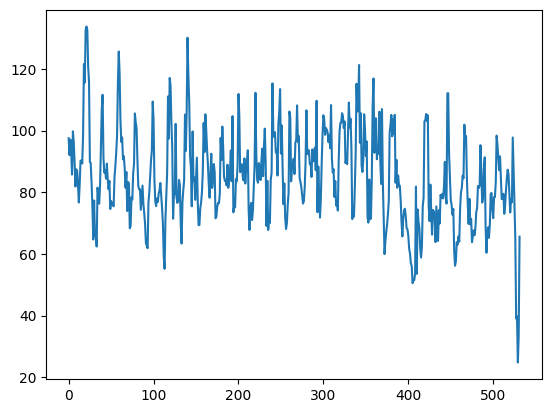

In [21]:
import matplotlib.pyplot as plt

plt.plot(angles)

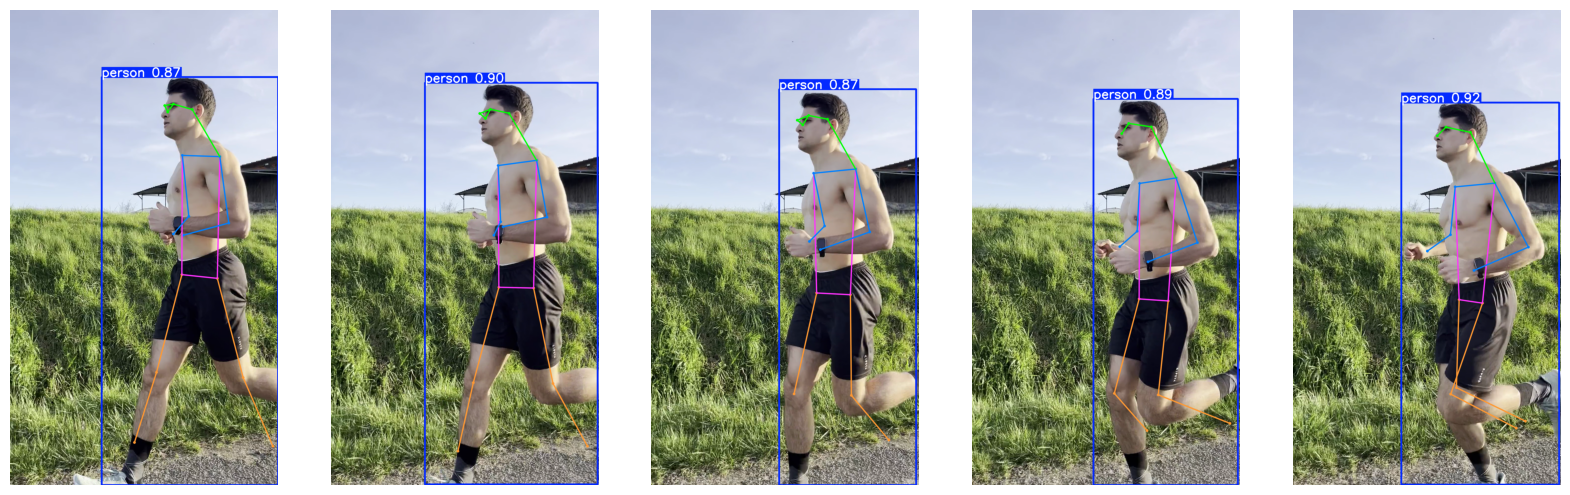

In [29]:
fig, ax = plt.subplots(1, 5, figsize=(20, 10))

for i, result in enumerate(results[:5]):
    img_output = result.plot()
    img_rgb = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)
    ax[i].imshow(img_rgb)
    ax[i].axis('off')

plt.show()

In [33]:
import cv2

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can use other codecs like 'XVID'
out = cv2.VideoWriter('output_video.mp4', fourcc, fps, (img_rgb.shape[1], img_rgb.shape[0]))

for result in results:
    img_output = result.plot()
    img_rgb = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)
    out.write(img_rgb)

# Release everything if job is finished
out.release()
cv2.destroyAllWindows()